In [1]:
from skimage import io, color, data, draw, exposure, feature, filters, measure, morphology, util, segmentation
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as sft
import scipy.signal as sps
from PIL import Image

In [2]:
%load_ext autoreload
%autoreload 2

from source import Helper
h = Helper()

## 1. Equilateral triangle

Load the sticker

Text(0.5, 1.0, 'Sticker in Frequency Domain')

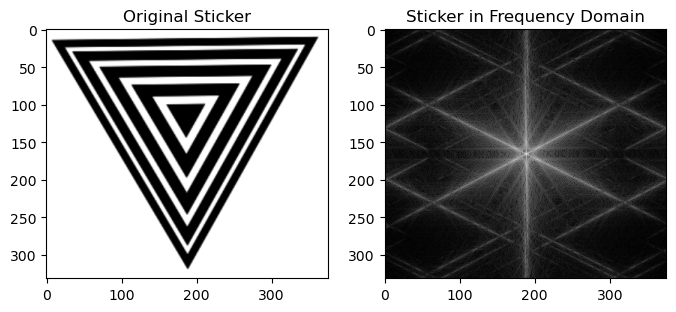

In [51]:
#sticker = np.asarray(Image.open('stickers/triangle.png'))

# Convert from rgba to gray
sticker = io.imread('stickers/triangle.png', as_gray = True)
dft_sticker = h.get_dft(sticker)
dft_sticker = h.get_dft_magnitude(dft_sticker)

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(sticker, cmap='gray')
ax1.set_title("Original Sticker")
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(dft_sticker,  cmap='gray')
ax2.set_title("Sticker in Frequency Domain")


DFT of the sticker:

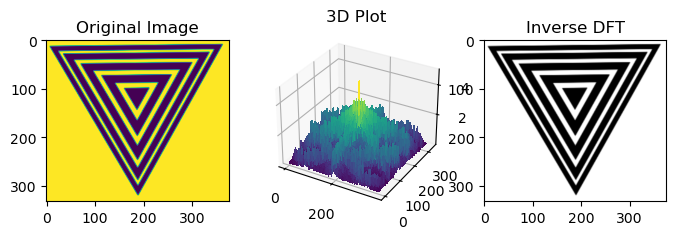

In [36]:
h.display_img(sticker)

Choose a random frame from the video

(960, 1708)

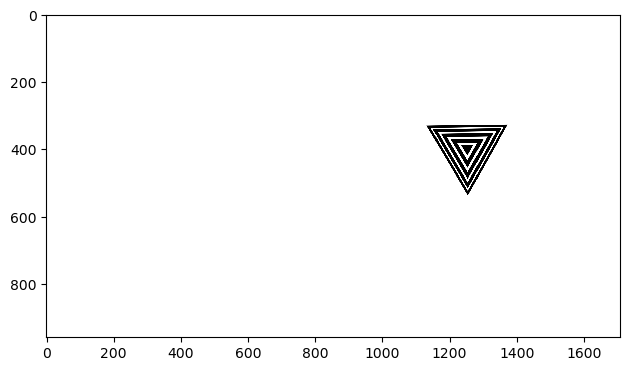

In [4]:
image = io.imread('Zeyi_Draft/test1.png', as_gray=True)
io.imshow(image)
image.shape

Create a 2-D spectrogram of the image

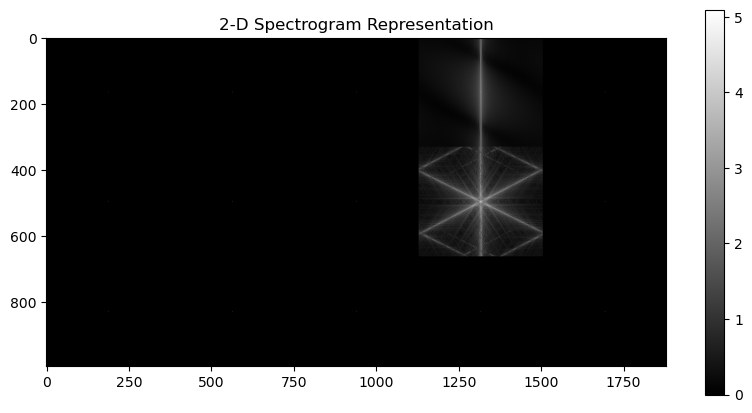

In [5]:
composite_dft = h.create_spectrogram(sticker,image)
h.show_spectrogram(composite_dft, sticker, grid = False)

Use the Spectrogram to find out the location of the sticker

In [7]:
best_box,min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(sticker,image)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_mse)
print(sorted_box_idx)

Best Search Box: 9
Minimum value of MSE: 0.19468504233784487
[0.19468504 0.22369909 0.66818196 0.66818196 0.66818196 0.66818196
 0.66818196 0.66818196 0.66818196 0.66818196 0.66818196 0.66818196
 0.66818196 0.66818196 0.66818196]
[9, 4, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15]


In [8]:
best_box, max_ssim, sorted_box_idx, sorted_ssim = h.find_location_ssim(sticker,image)
print(f'Best Search Box: {best_box}')
print(f'Maximum value of SSIM: {max_ssim}')
print(sorted_ssim)
print(sorted_box_idx)

Best Search Box: 4
Maximum value of SSIM: 0.3887036276006206
[0.0215692  0.0215692  0.0215692  0.0215692  0.0215692  0.0215692
 0.0215692  0.0215692  0.0215692  0.0215692  0.0215692  0.0215692
 0.0215692  0.27163445 0.38870363]
[1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 9, 4]


When the image is in between the two boxes:

(960, 1708)


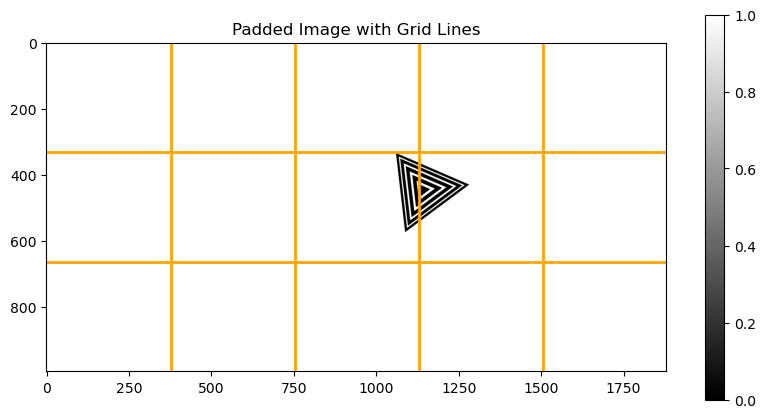

In [9]:
# Load the image
image2 = io.imread('Zeyi_Draft/test2.png', as_gray=True)
#plt.imshow(image2, cmap="gray")
print(image2.shape)
h.show_grid(sticker, image2)

Plot the spectrogram:

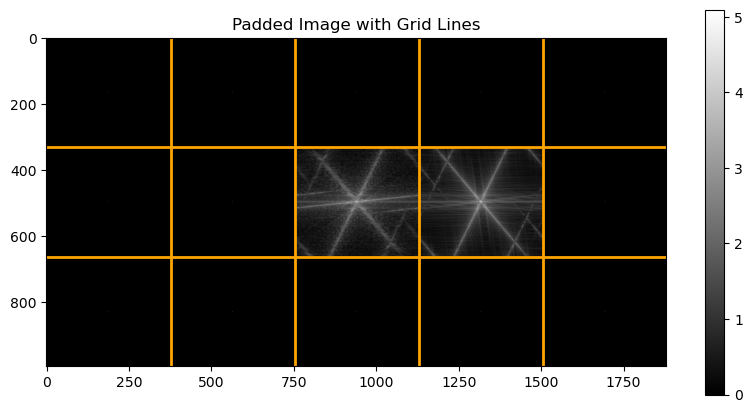

In [10]:
composite_dft = h.create_spectrogram(sticker,image2)
h.show_spectrogram(composite_dft,sticker, grid = True)

Find the location:

In [11]:
best_box,min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(sticker,image2)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_box_idx)
print(sorted_mse)

Best Search Box: 8
Minimum value of MSE: 0.3359191792027657
[8, 9, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15]
[0.33591918 0.33643704 0.66818196 0.66818196 0.66818196 0.66818196
 0.66818196 0.66818196 0.66818196 0.66818196 0.66818196 0.66818196
 0.66818196 0.66818196 0.66818196]


In [12]:
best_box, max_ssim, sorted_box_idx, sorted_ssim = h.find_location_ssim(sticker,image2)
print(f'Best Search Box: {best_box}')
print(f'Maximum value of SSIM: {max_ssim}')
print(sorted_ssim)
print(sorted_box_idx)

Best Search Box: 8
Maximum value of SSIM: 0.1984997071419692
[0.0215692  0.0215692  0.0215692  0.0215692  0.0215692  0.0215692
 0.0215692  0.0215692  0.0215692  0.0215692  0.0215692  0.0215692
 0.0215692  0.19361346 0.19849971]
[1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 9, 8]


## Triangle with noisy background

Load the image

(960, 1708)


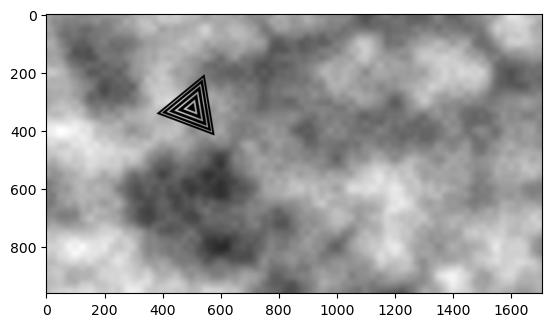

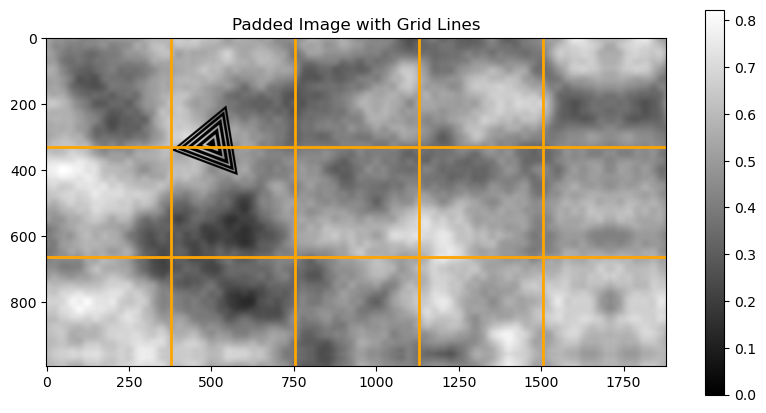

In [13]:
image3 = io.imread('Zeyi_Draft/test3.png', as_gray=True)
plt.imshow(image3, cmap="gray")
print(image3.shape)
h.show_grid(sticker, image3)

Create spectrogram of the image

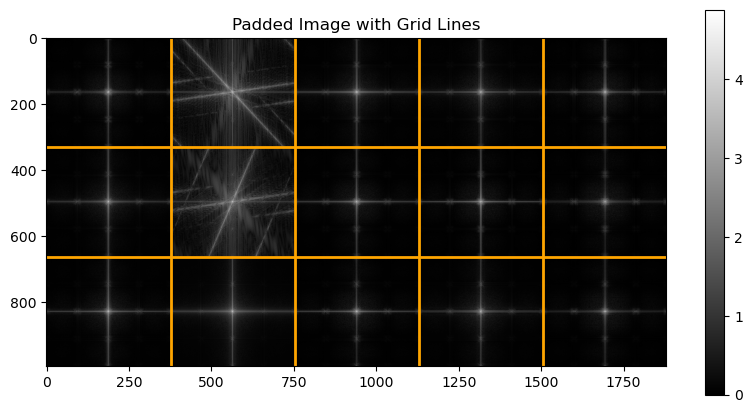

In [14]:
composite_dft = h.create_spectrogram(sticker,image3)
h.show_spectrogram(composite_dft,sticker,grid = True)

Find the location of the sticker

In [15]:
best_box, min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(sticker,image3)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_mse)
print(sorted_box_idx)


Best Search Box: 7
Minimum value of MSE: 0.22969897112790896
[0.22969897 0.24355343 0.33800464 0.39806222 0.40038912 0.40250065
 0.40385429 0.40718147 0.43695415 0.43735583 0.43919951 0.43939014
 0.44739418 0.45439127 0.45699385]
[7, 2, 12, 3, 4, 6, 14, 11, 8, 1, 5, 9, 13, 15, 10]


In [16]:
best_box, max_ssim, sorted_box_idx, sorted_ssim = h.find_location_ssim(sticker,image3)
print(f'Best Search Box: {best_box}')
print(f'Maximum value of SSIM: {max_ssim}')
print(sorted_ssim)
print(sorted_box_idx)

Best Search Box: 12
Maximum value of SSIM: 0.24927690277376988
[0.14633349 0.14765315 0.15229496 0.15578208 0.15776656 0.15790769
 0.16160803 0.18487442 0.18570611 0.18899074 0.18964747 0.19286689
 0.23339452 0.23576056 0.2492769 ]
[10, 15, 13, 5, 1, 9, 8, 11, 3, 6, 14, 4, 7, 2, 12]


View Spectrogram as video

In [17]:
import view_spectrogram as view
#view.view_spectrogram(sticker, 'noisy_triangles')

### Right Triangle

Text(0.5, 1.0, 'Sticker in Frequency Domain')

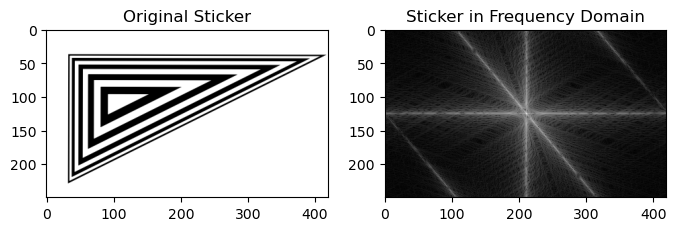

In [50]:
sticker4 = io.imread("stickers/right_triangle.png", as_gray = True)
sticker4.shape
dft_sticker4 = h.get_dft(sticker4)
dft_sticker4 = h.get_dft_magnitude(dft_sticker4)

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(sticker4, cmap='gray')
ax1.set_title("Original Sticker")
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(dft_sticker4,  cmap='gray')
ax2.set_title("Sticker in Frequency Domain")

(800, 1600)


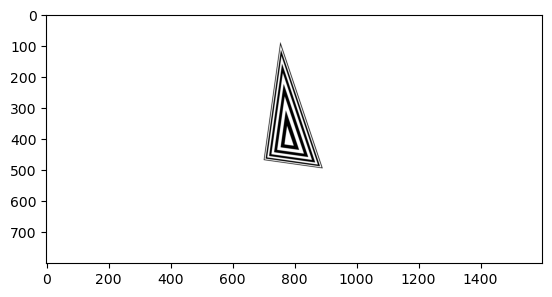

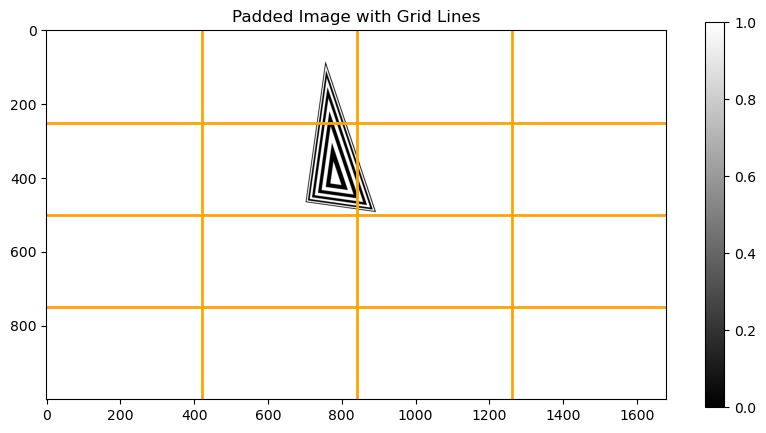

In [45]:
image4 = io.imread("rotating_30_60_90_chirps_video/vid_30_60_90_chirp_sticker-2.png", as_gray = True)
plt.imshow(image4, cmap="gray")
print(image4.shape)
h.show_grid(sticker4, image4)

<class 'numpy.ndarray'>


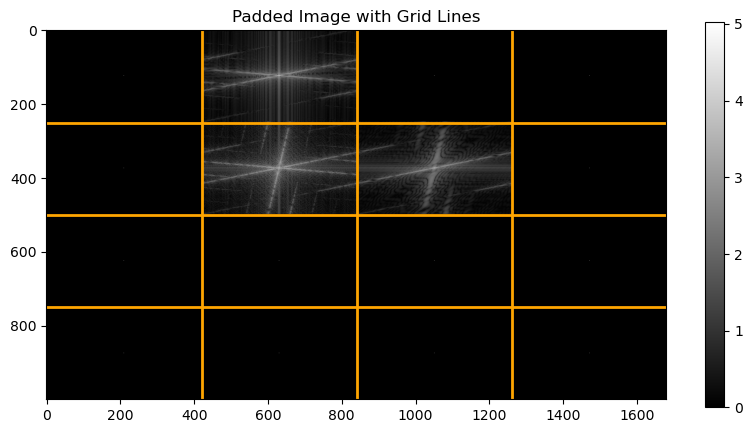

In [52]:
composite_dft = h.create_spectrogram(sticker4,image4)
print(type(composite_dft))
h.show_spectrogram(composite_dft, sticker4, grid = True)

In [21]:
best_box,min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(sticker4,image4)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_box_idx)
print(sorted_mse)

Best Search Box: 7
Minimum value of MSE: 0.2138595048068092
[7, 2, 6, 1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0.2138595  0.21956775 0.26347376 0.66352839 0.66352839 0.66352839
 0.66352839 0.66352839 0.66352839 0.66352839 0.66352839 0.66352839
 0.66352839 0.66352839 0.66352839 0.66352839]


## Changing Background

(720, 1200)


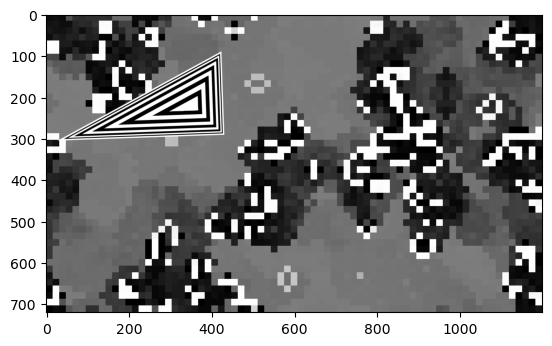

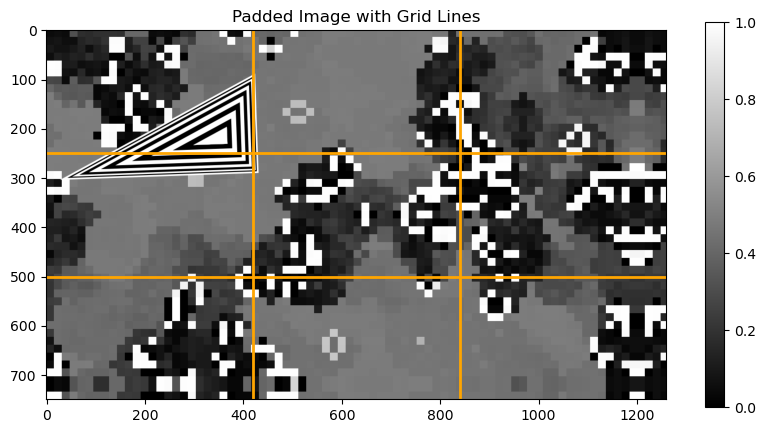

In [47]:
image5 = io.imread("gol_background_30_60_90_vid/vid_30_60_90_gol-9.png", as_gray=True)
plt.imshow(image5, cmap="gray")
print(image5.shape)
h.show_grid(sticker4, image5)

Create spectrogram

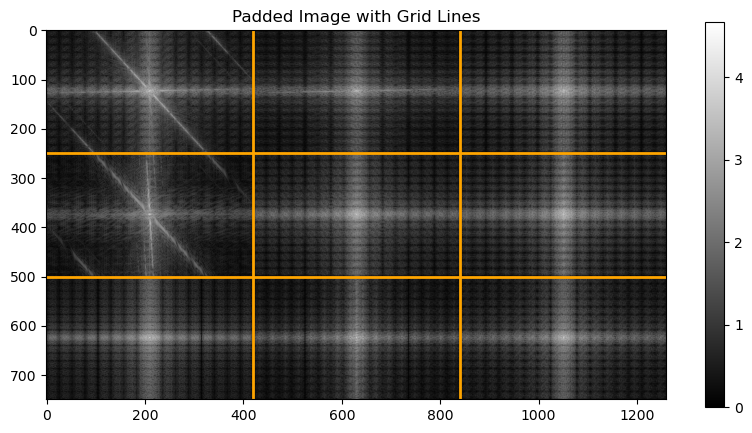

In [23]:
composite_dft = h.create_spectrogram(sticker4,image5)
h.show_spectrogram(composite_dft, sticker4, grid = True)


Find the location of the sticker

In [24]:
best_box,min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(sticker4,image5)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_box_idx)
print(sorted_mse)

Best Search Box: 4
Minimum value of MSE: 0.1458090907744969
[4, 8, 2, 9, 7, 1, 3, 5, 6]
[0.14580909 0.16343923 0.17392301 0.2058584  0.21940351 0.23094906
 0.24079376 0.25514709 0.28308464]


View the Spectrogram as video

In [25]:
import view_spectrogram as view
#view.view_spectrogram(sticker4,'rotating_30_60_90_chirps_video')

## Real Life Videos

(1080, 1920)


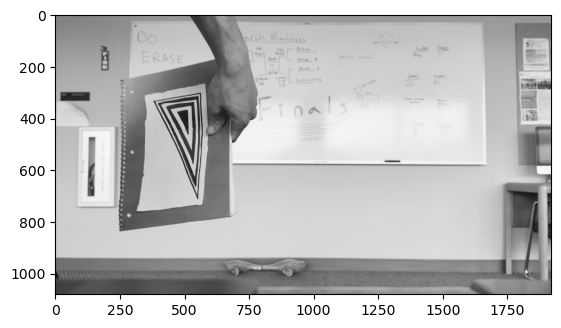

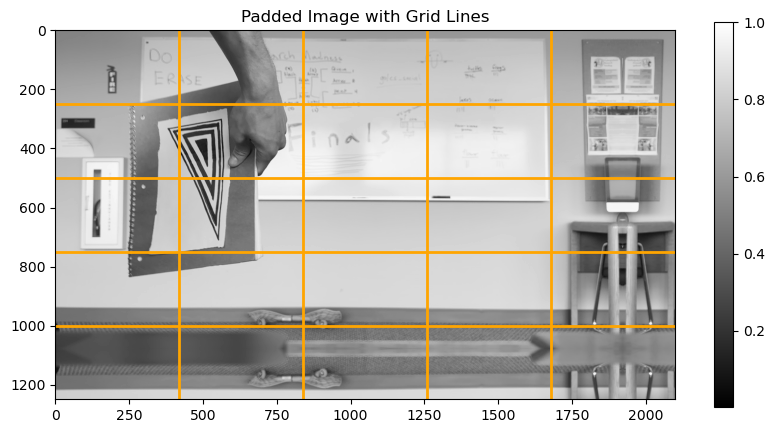

In [56]:
image = io.imread("real_life_videos/frame_0142.png", as_gray=True)
plt.imshow(image, cmap="gray")
print(image.shape)
h.show_grid(sticker4, image)

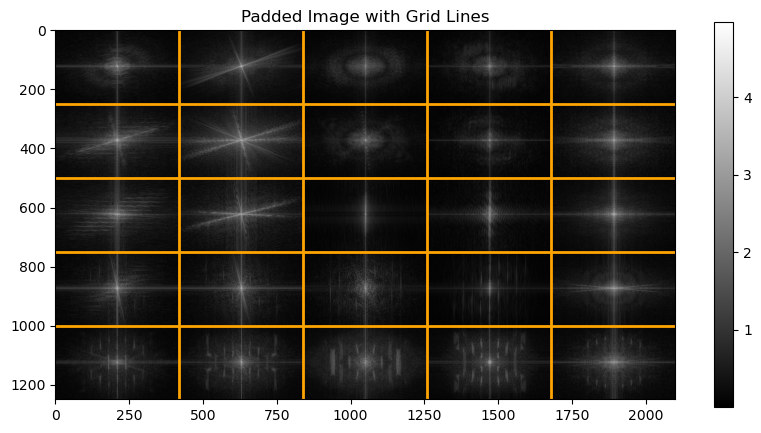

In [57]:
composite_dft = h.create_spectrogram(sticker4,image)
h.show_spectrogram(composite_dft, sticker4, grid = True)


In [58]:
best_box,min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(sticker4,image)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_box_idx)
print(sorted_mse)

Best Search Box: 17
Minimum value of MSE: 0.13947047358207404
[17, 10, 15, 25, 16, 20, 11, 6, 12, 22, 5, 23, 7, 1, 2, 21, 24, 18, 4, 3, 14, 8, 9, 19, 13]
[0.13947047 0.14145472 0.14155663 0.14571494 0.14925621 0.15193536
 0.15861986 0.16180676 0.16282374 0.16674991 0.17436803 0.17844891
 0.17870379 0.18132704 0.1869483  0.18780749 0.19031355 0.19393816
 0.22312027 0.23050376 0.23135512 0.23661933 0.25320476 0.30015482
 0.30997107]
